In [150]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from matplotlib import pyplot

In [154]:
calgary_data = "Calgary_Factors.csv"
edmonton_data = "Edmonton_Factors.csv"
montreal_data = "Montreal_Factors.csv"
peel_data = "Peel_Factors.csv"
toronto_data = "Toronto_Factors.csv"

In [168]:
def random_forest_regression(data, name):
    usecols = range(1, 11)
    df = pd.read_csv(data)
    x = df[["Mean Temp (C)", "Total Precip (mm)", "Avg Rel Hum (%)", "Avg Wind Spd (km/h)", "Mean UV"]]
    y = df[["Cases"]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
    random_forest_regression_model = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, oob_score = True, bootstrap = True, criterion = "mse")
    random_forest_regression_model.fit(x_train, y_train.values.ravel())
    y_pred = random_forest_regression_model.predict(x_test)
    
    print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(random_forest_regression_model.score(x_train, y_train), 
                                                                                             random_forest_regression_model.oob_score_,
                                                                                            random_forest_regression_model.score(x_test, y_test)))
    
    importance = random_forest_regression_model.feature_importances_ 
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
    pyplot.figure(figsize=(10, 5))
    pyplot.title(name + " Feature Importances")
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.xticks(range(x.shape[1]), ["Mean Temp (C)", "Total Precip (mm)", "Avg Rel Hum (%)",
                                      "Avg Wind Spd (km/h)", "Mean UV"])
    
                               
    pyplot.show()

R^2 Training Score: 0.85 
OOB Score: -0.09 
R^2 Validation Score: 0.14
Feature: 0, Score: 0.24853
Feature: 1, Score: 0.07364
Feature: 2, Score: 0.24638
Feature: 3, Score: 0.22730
Feature: 4, Score: 0.20415


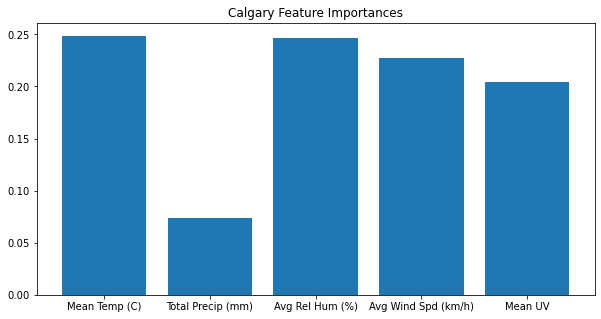

In [169]:
random_forest_regression(calgary_data, "Calgary")

R^2 Training Score: 0.87 
OOB Score: 0.02 
R^2 Validation Score: 0.06
Feature: 0, Score: 0.23596
Feature: 1, Score: 0.05204
Feature: 2, Score: 0.22008
Feature: 3, Score: 0.20362
Feature: 4, Score: 0.28830


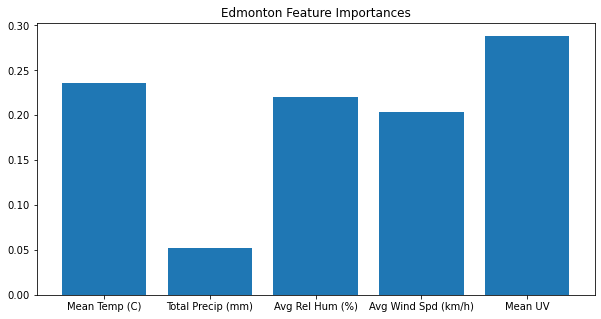

In [170]:
random_forest_regression(edmonton_data, "Edmonton")

R^2 Training Score: 0.86 
OOB Score: -0.14 
R^2 Validation Score: 0.15
Feature: 0, Score: 0.20935
Feature: 1, Score: 0.19625
Feature: 2, Score: 0.19863
Feature: 3, Score: 0.19776
Feature: 4, Score: 0.19802


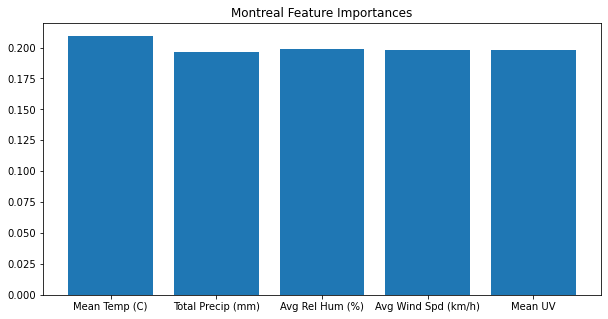

In [171]:
random_forest_regression(montreal_data, "Montreal")

R^2 Training Score: 0.92 
OOB Score: 0.38 
R^2 Validation Score: 0.43
Feature: 0, Score: 0.20679
Feature: 1, Score: 0.06981
Feature: 2, Score: 0.11709
Feature: 3, Score: 0.15751
Feature: 4, Score: 0.44881


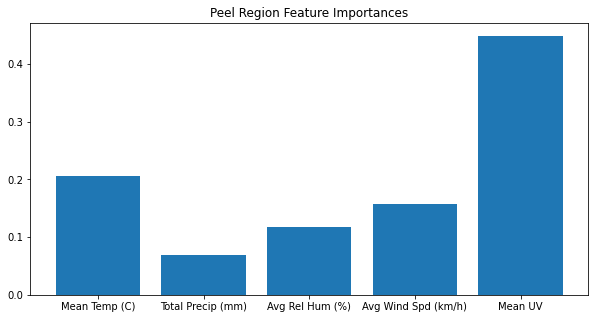

In [172]:
random_forest_regression(peel_data, "Peel Region")

R^2 Training Score: 0.89 
OOB Score: 0.24 
R^2 Validation Score: 0.31
Feature: 0, Score: 0.25570
Feature: 1, Score: 0.08033
Feature: 2, Score: 0.22195
Feature: 3, Score: 0.11052
Feature: 4, Score: 0.33150


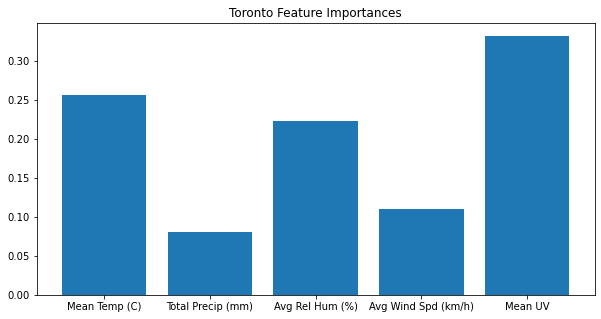

In [173]:
random_forest_regression(toronto_data, "Toronto")